In [1]:
import pandas as pd
import pyarrow as pa
import pyarrow.parquet as pq
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


# Data

In [2]:
muni = pd.read_csv('/Users/julianeoliveira/Documents/Projects/AESOP/AESOP datalake/DTB_BRASIL_MUNICIPIO.csv',sep=';')

muni = muni[['UF', 'Nome_UF', 'Mesorregião Geográfica', 'Nome_Mesorregião',
       'Microrregião Geográfica', 'Nome_Microrregião', 'Município',
       'Código Município Completo', 'Nome_Município']]

muni = muni.assign(co_ibge6 = muni['Código Município Completo'].astype(str).str[0:6])

muni.co_ibge6 = muni.co_ibge6.astype(int)

dta = pd.read_csv('/Users/julianeoliveira/Downloads/union_paths.csv')


hubs = pd.read_csv('/Users/julianeoliveira/Downloads/Reproducibility results_paper2/data/lists_of_hubs.csv')
hubs = hubs[['Nome_UF', 'co_ibge', 'Nome_Município', 'hub_ind_proxi',
       'hub_ind_intermed', 'hub_inter']]


# Read the Adjacent matrix
link0 = '/Users/julianeoliveira/Downloads/adjacency_matrix_correct.parquet'

matrix = pd.read_parquet(link0, engine='pyarrow')

link_muni_vertice = pd.DataFrame(matrix.columns, columns=['muni'])

df_np = matrix.to_numpy()

In [3]:
df = pd.read_parquet('/Users/julianeoliveira/Downloads/aesop_2025_10_01_mun_withNewEnsIvas.parquet')

df = df[df.epiyear >= 2022]

In [4]:
def get_mname(n):
    
    m = link_muni_vertice.iloc[n]['muni']
    set_muni = muni[muni['Código Município Completo'] == m].reset_index()
    return [set_muni.iloc[0]['Nome_Município'],set_muni.iloc[0]['Nome_UF'],m]
   
def get_mnumber(name):
    muni[muni['Nome_Município'] == name]
    
    co_mu = muni[muni['Nome_Município'] == name].reset_index()['Código Município Completo'][0]
    muni_number = link_muni_vertice[link_muni_vertice['muni'] == co_mu]['muni'].index.tolist()[0]
    return [muni_number, co_mu]

def col_name(dtf,col):
    lst = []
    for value in col:
        muni_name = get_mname(value)[0]
        uf_muni = get_mname(value)[1]
        cod_ibge_muni = get_mname(value)[2]
    
        lst.append([muni_name,uf_muni,cod_ibge_muni])
    
    dta = pd.DataFrame(lst, columns=['muni_name','uf_muni','cod_ibge_muni'])
    
    dtf = dtf.assign(muni_name = dta.muni_name)
    dtf = dtf.assign(uf_muni = dta.uf_muni)
    dtf = dtf.assign(cod_ibge_muni = dta.cod_ibge_muni)
    
    return dtf

# Inicio das analises para um municipio

## Dado de saude

In [5]:
# Seleciona um municipio
city = 3520400

set_muni = df[df.co_ibge7 == city]

In [6]:
set_muni

,co_ibge,epiyear,epiweek,atend_totais,atend_ivas,atend_arbov,atend_diarreicas,atend_0a11,year_week,epidemi_cal_start,...,sinal_mmaing_consec_ivas_012,sinal_mmaing_consec_arbov_012,sinal_ens_consec_ivas_012,sinal_ens_consec_arbov_012,sinal_otc_consec_ivas_012,sinal_aesop_consec_ivas_012,mem_surge,mem_surge_01,risk_probs,sinal_ens_ivas_new
1592347,352040,2022,42,4348,155,5,5,555,2022-42,2022-10-16,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.459308,0.0
1592348,352040,2022,43,4120,179,3,6,662,2022-43,2022-10-23,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.459308,0.0
1592349,352040,2022,44,3469,137,6,5,524,2022-44,2022-10-30,...,0.0,0.0,0.0,1.0,0.0,0.0,0,0,0.459308,0.0
1592350,352040,2022,45,4148,204,1,2,567,2022-45,2022-11-06,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.459308,0.0
1592351,352040,2022,46,2171,268,4,1,255,2022-46,2022-11-13,...,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0.459308,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1592495,352040,2025,34,0,0,0,0,0,2025-34,2025-08-17,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.459308,0.0
1592496,352040,2025,35,0,0,0,0,0,2025-35,2025-08-24,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.459308,0.0
1592497,352040,2025,36,0,0,0,0,0,2025-36,2025-08-31,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.459308,0.0
1592498,352040,2025,37,0,0,0,0,0,2025-37,2025-09-07,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.459308,0.0


In [10]:
lst = ['sigla_uf','co_uf','nm_uf',
 'nm_municipio','co_ibge',  'co_ibge7',
 'epiyear','epiweek','epidemi_cal_start', 'year_week',
 'atend_totais','atend_ivas',
 'sinal_ens_ivas','sinal_otc_ivas','Aviso AESOP',
 'alerta_vizinho', 'aviso_vizinho','sinais_vizinhos',
  'sinal_ens_ivas_new']

In [11]:
set_muni = set_muni[lst]

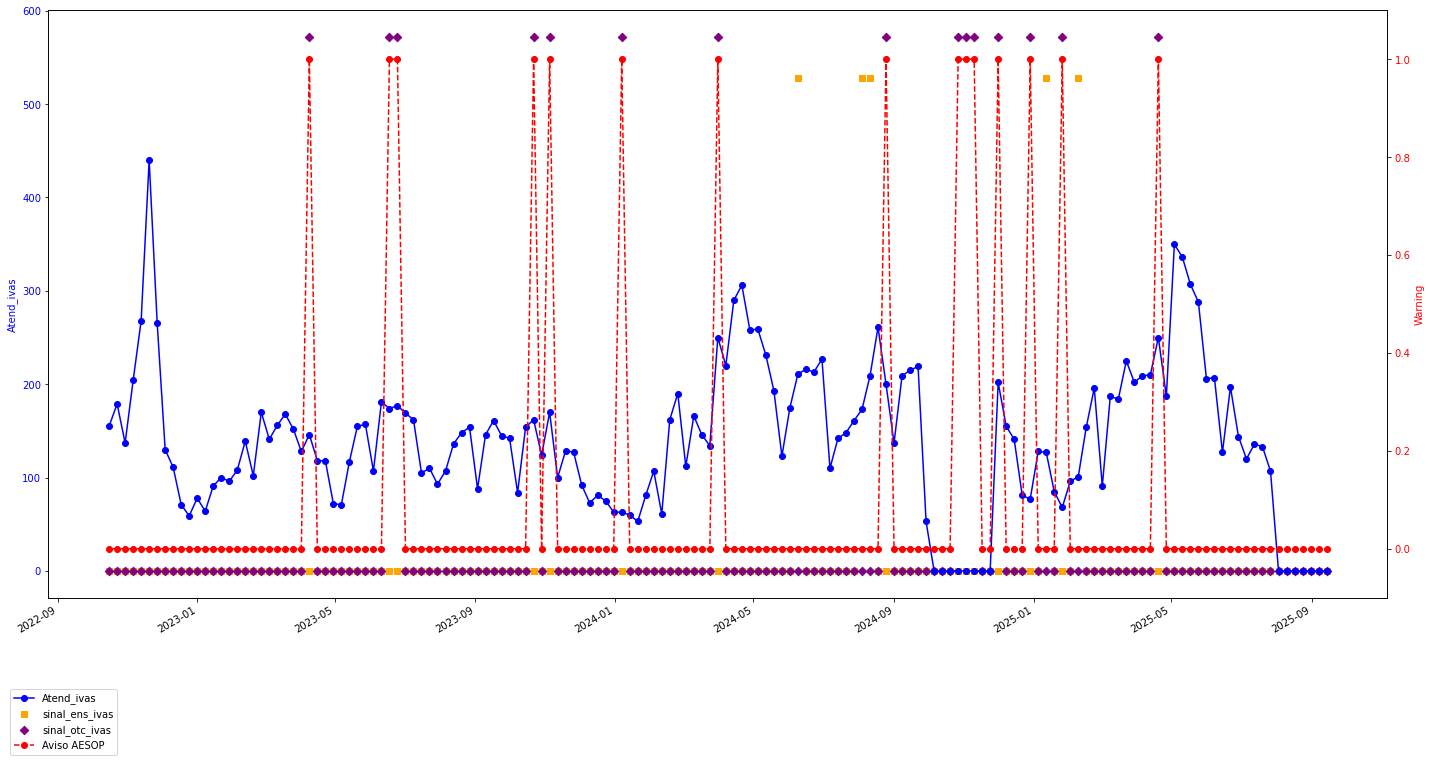

In [12]:
plotdf = set_muni.copy()

fig, ax1 = plt.subplots(figsize=(24,12))

# atend_ivas line
ax1.plot(plotdf["epidemi_cal_start"], plotdf["atend_ivas"], marker="o", label="Atend_ivas", color="blue")
ax1.set_ylabel("Atend_ivas", color="blue")
ax1.tick_params(axis='y', labelcolor="blue")

# Add markers for individual model warnings
#ax1.scatter(plotdf["year_week"], 
#            plotdf["Aviso AESOP"] * plotdf["atend_ivas"].max()*1.1, 
#            marker="^", color="green", label="Aviso AESOP")

ax1.scatter(plotdf["epidemi_cal_start"], 
            plotdf["sinal_ens_ivas"] * plotdf["atend_ivas"].max()*1.2, 
            marker="s", color="orange", label="sinal_ens_ivas")

ax1.scatter(plotdf["epidemi_cal_start"], 
            plotdf["sinal_otc_ivas"] * plotdf["atend_ivas"].max()*1.3, 
            marker="D", color="purple", label="sinal_otc_ivas")

# Add secondary axis for consecutive warnings
ax2 = ax1.twinx()
ax2.plot(plotdf["epidemi_cal_start"], plotdf["Aviso AESOP"], #mem_surge_01 warning_final_mem_surge_01, 
         marker="o", color="red", linestyle="--", label="Aviso AESOP")
ax2.set_ylabel("Warning", color="red")
ax2.tick_params(axis='y', labelcolor="red")
ax2.set_ylim(-0.1, 1.1)

# Legends
fig.legend(loc="upper left", bbox_to_anchor=(0.1, 0.10))
#plt.title(f"Municipality {muni}: Atend_ivas and Model Warnings")
fig.autofmt_xdate()
plt.show()


## Dado de mobilidade

In [13]:
dta = dta[['ori_muni_name','ori_uf_name', 'ori_co_ibge', 
           'des_muni_name', 'des_uf_name','des_co_ibge', 
           'path_correct', 'value','muni_1', 'muni_2', 'muni_3','ones']]

In [14]:
# set origem as the city selected before

set_muni_mob = dta[dta.ori_co_ibge == city]

In [15]:
set_muni_mob = set_muni_mob.groupby(['ori_muni_name','ori_uf_name','ori_co_ibge','muni_1'])[['ones','value']].sum().reset_index()
set_muni_mob = col_name(set_muni_mob, set_muni_mob.muni_1)
set_muni_mob = set_muni_mob.assign(per = set_muni_mob.ones*100/sum(set_muni_mob.ones))


In [20]:
lst_des_muni

[3520400]

In [16]:
lst_des_muni = list(set_muni_mob.cod_ibge_muni.unique())

lst_des_muni.append(city)

lst = ['sigla_uf','co_uf','nm_uf',
 'nm_municipio','co_ibge',  'co_ibge7',
 'epiyear','epiweek','epidemi_cal_start', 'year_week',
 'atend_totais','atend_ivas',
 'sinal_ens_ivas','sinal_otc_ivas','Aviso AESOP',
 'alerta_vizinho', 'aviso_vizinho','sinais_vizinhos',
  'sinal_ens_ivas_new']

data1 = df[df.co_ibge7.isin(lst_des_muni)]

data1 = data1[lst]

In [17]:
# seleciona uma semana onde observamos um aviso no município selecionado (origem) e verificamos quando aparece aviso 
# nos destinos

#data2 = data1[(data1.year_week >= '2023-34') & (data1.year_week <= '2023-42')][['co_ibge7','year_week','Aviso AESOP']]

data2 = data1[['co_ibge7','year_week','Aviso AESOP']]

In [18]:
table = pd.pivot_table(data2, values='Aviso AESOP', index=['co_ibge7'],
                   columns=['year_week'], aggfunc="sum")


In [19]:
table

year_week,2022-42,2022-43,2022-44,2022-45,2022-46,2022-47,2022-48,2022-49,2022-50,2022-51,...,2025-29,2025-30,2025-31,2025-32,2025-33,2025-34,2025-35,2025-36,2025-37,2025-38
co_ibge7,,,,,,,,,,,,,,,,,,,,,
3520400,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
index_city = city
neighbours = list(set_muni_mob.cod_ibge_muni.unique())#[1100023,1100049,1100122,1100189,1100205,1100254,1100288,1100296]


In [33]:
def conditional_spread_prob(df, index_city, neighbours, k=1):
    """
    Compute P(neighbour has >=1 warning within k weeks starting at same week as index warning),
    aggregated over all index warnings observed in df.
    
    Parameters
    ----------
    df : DataFrame (rows=cities indexed by code, cols=week labels)
    index_city : city code
    neighbours : list of neighbour city codes
    k : int, window size in weeks (k=0 means same week only; k=1 means same week or next week)
    """
    weeks = list(df.columns)
    n_weeks = len(weeks)
    
    # Find all weeks where index city has a warning (=1)
    index_weeks = [i for i,w in enumerate(weeks) if df.loc[index_city, w] == 1]
    if not index_weeks:
        return None
    
    # For each neighbour, count how many index-week events were followed by at least one warning
    results = []
    for n in neighbours:
        triggered = 0
        total = 0
        for iw in index_weeks:
            # define window [iw, iw + k] inclusive, but not beyond available weeks
            start = iw
            end = min(iw + k, n_weeks - 1)
            total += 1
            # check if neighbour has any 1 in that window
            window_weeks = weeks[start:end+1]
            if df.loc[n, window_weeks].sum() > 0:
                triggered += 1
        prob = triggered / total if total > 0 else np.nan
        results.append({'neighbour': n, 'triggered': triggered, 'total_index_events': total, 'P': prob})
    
    res_df = pd.DataFrame(results).set_index('neighbour')
    # Aggregate across neighbours: probability that *a random neighbour* is triggered
    agg_P = res_df['P'].mean()
    # Probability that at least one neighbour is triggered for each index event
    # compute per index event whether any neighbour had 1 in window, then average
    any_trigger_per_event = []
    for iw in index_weeks:
        start = iw
        end = min(iw + k, n_weeks - 1)
        window_weeks = weeks[start:end+1]
        # check across all neighbours for that index event
        any_trigger = (df.loc[neighbours, window_weeks].sum(axis=0).sum() > 0)
        any_trigger_per_event.append(1 if any_trigger else 0)
    prob_any_neighbour = np.mean(any_trigger_per_event)
    
    return res_df, agg_P, prob_any_neighbour, index_weeks



In [34]:
# Compute for k = 0 (same week), k = 1 (same or next week), and k = 2
outputs = {}
for k in [0,1,2,3,4,5]:
    res_df, agg_P, prob_any_neighbour, index_weeks = conditional_spread_prob(table, index_city, neighbours, k=k)
    outputs[k] = {'per_neighbour': res_df, 'avg_P_neighbour': agg_P, 'P_any_neighbour': prob_any_neighbour, 'index_weeks': index_weeks}

# Display results
for k, out in outputs.items():
    print(f"\n=== Window k={k} (same week + next {k} weeks) ===")
    print("Index city warning weeks (positions):", out['index_weeks'])
    display(out['per_neighbour'])  # Using display so DataFrame looks nice in the notebook
    print(f"Average neighbour-level probability P = {out['avg_P_neighbour']:.3f}")
    print(f"Probability at least one neighbour triggered given an index event = {out['P_any_neighbour']:.3f}")



=== Window k=0 (same week + next 0 weeks) ===
Index city warning weeks (positions): [35, 36, 44, 45, 46, 47, 48, 49, 50, 51, 53, 54, 55, 56, 57, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 79, 80, 81, 87, 88, 101, 103, 112, 116, 117, 126, 141]


,triggered,total_index_events,P
neighbour,,,
1100023,9,40,0.225
1100049,11,40,0.275
1100122,11,40,0.275
1100189,14,40,0.350
1100205,13,40,0.325
1100254,13,40,0.325
1100288,17,40,0.425
1100296,16,40,0.400


Average neighbour-level probability P = 0.325
Probability at least one neighbour triggered given an index event = 0.925

=== Window k=1 (same week + next 1 weeks) ===
Index city warning weeks (positions): [35, 36, 44, 45, 46, 47, 48, 49, 50, 51, 53, 54, 55, 56, 57, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 79, 80, 81, 87, 88, 101, 103, 112, 116, 117, 126, 141]


,triggered,total_index_events,P
neighbour,,,
1100023,14,40,0.350
1100049,21,40,0.525
1100122,16,40,0.400
1100189,19,40,0.475
1100205,22,40,0.550
1100254,21,40,0.525
1100288,25,40,0.625
1100296,22,40,0.550


Average neighbour-level probability P = 0.500
Probability at least one neighbour triggered given an index event = 0.975

=== Window k=2 (same week + next 2 weeks) ===
Index city warning weeks (positions): [35, 36, 44, 45, 46, 47, 48, 49, 50, 51, 53, 54, 55, 56, 57, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 79, 80, 81, 87, 88, 101, 103, 112, 116, 117, 126, 141]


,triggered,total_index_events,P
neighbour,,,
1100023,20,40,0.500
1100049,25,40,0.625
1100122,22,40,0.550
1100189,23,40,0.575
1100205,27,40,0.675
1100254,27,40,0.675
1100288,28,40,0.700
1100296,26,40,0.650


Average neighbour-level probability P = 0.619
Probability at least one neighbour triggered given an index event = 1.000

=== Window k=3 (same week + next 3 weeks) ===
Index city warning weeks (positions): [35, 36, 44, 45, 46, 47, 48, 49, 50, 51, 53, 54, 55, 56, 57, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 79, 80, 81, 87, 88, 101, 103, 112, 116, 117, 126, 141]


,triggered,total_index_events,P
neighbour,,,
1100023,25,40,0.625
1100049,28,40,0.700
1100122,25,40,0.625
1100189,26,40,0.650
1100205,29,40,0.725
1100254,29,40,0.725
1100288,31,40,0.775
1100296,28,40,0.700


Average neighbour-level probability P = 0.691
Probability at least one neighbour triggered given an index event = 1.000

=== Window k=4 (same week + next 4 weeks) ===
Index city warning weeks (positions): [35, 36, 44, 45, 46, 47, 48, 49, 50, 51, 53, 54, 55, 56, 57, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 79, 80, 81, 87, 88, 101, 103, 112, 116, 117, 126, 141]


,triggered,total_index_events,P
neighbour,,,
1100023,28,40,0.700
1100049,30,40,0.750
1100122,30,40,0.750
1100189,29,40,0.725
1100205,31,40,0.775
1100254,32,40,0.800
1100288,34,40,0.850
1100296,30,40,0.750


Average neighbour-level probability P = 0.762
Probability at least one neighbour triggered given an index event = 1.000

=== Window k=5 (same week + next 5 weeks) ===
Index city warning weeks (positions): [35, 36, 44, 45, 46, 47, 48, 49, 50, 51, 53, 54, 55, 56, 57, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 79, 80, 81, 87, 88, 101, 103, 112, 116, 117, 126, 141]


,triggered,total_index_events,P
neighbour,,,
1100023,29,40,0.725
1100049,34,40,0.850
1100122,33,40,0.825
1100189,33,40,0.825
1100205,32,40,0.800
1100254,35,40,0.875
1100288,36,40,0.900
1100296,31,40,0.775


Average neighbour-level probability P = 0.822
Probability at least one neighbour triggered given an index event = 1.000


In [273]:
# format data for the specific city

lst_res = []

for k, out in outputs.items():
    
 
    res_data = out['per_neighbour'].reset_index()
    
    res_data = res_data.assign(average_neighbour_level_probability = out['avg_P_neighbour'],
                              prob_at_least_one_neighbour_triggered = out['P_any_neighbour'],
                              k = k,
                              origen_city = city)
 
    
    lst_res.append(res_data)

In [274]:
lst_res[2]

,neighbour,triggered,total_index_events,P,average_neighbour_level_probability,prob_at_least_one_neighbour_triggered,k,origen_city
0,1100023,20,40,0.500,0.61875,1.0,2,1100015
1,1100049,25,40,0.625,0.61875,1.0,2,1100015
2,1100122,22,40,0.550,0.61875,1.0,2,1100015
3,1100189,23,40,0.575,0.61875,1.0,2,1100015
4,1100205,27,40,0.675,0.61875,1.0,2,1100015
5,1100254,27,40,0.675,0.61875,1.0,2,1100015
6,1100288,28,40,0.700,0.61875,1.0,2,1100015
7,1100296,26,40,0.650,0.61875,1.0,2,1100015


# Run for all cities


# Probabilidade de espalhamento em uma janela de tempo, ao observar o aviso em uma cidade

In [182]:
def compute_spread_probability(df, index_city, neighbours, start_week=None):
    """
    Compute empirical spread probability from one index city to its neighbours.

    Parameters
    ----------
    df : pd.DataFrame
        Rows = city codes, columns = week identifiers (e.g., '2023-34'), values = 0/1.
    index_city : str or int
        City code of the source (index) city.
    neighbours : list
        List of city codes (neighbours in the network).
    start_week : str, optional
        Week when the index city first had a warning. If None, inferred automatically.
    """

    # Ensure week columns are sorted
    df = df.copy()
    df = df[sorted(df.columns, key=lambda x: int(x.split('-')[1]))]

    # Get index city signal
    signal = df.loc[index_city]

    # Find start week if not given
    if start_week is None:
        start_week = signal[signal == 1].index[0]
    start_idx = list(df.columns).index(start_week)

    # For each neighbour, find delay to first 1 after start_week
    delays = []
    for n in neighbours:
        neigh_signal = df.loc[n].iloc[start_idx + 1:]
        first_1 = np.argmax(neigh_signal.values == 1) if 1 in neigh_signal.values else None
        if first_1 is not None and neigh_signal.values[first_1] == 1:
            delays.append(first_1 + 1)  # +1 because indices start at 0
        else:
            delays.append(np.nan)

    # Build results dataframe
    res = pd.DataFrame({
        'city': neighbours,
        'delay_weeks': delays
    })

    # Empirical cumulative probability of spread
    valid_delays = res['delay_weeks'].dropna().astype(int)
    max_delay = valid_delays.max() if not valid_delays.empty else 0
    weeks = np.arange(1, max_delay + 1)
    prob_cum = [np.mean(valid_delays <= k) for k in weeks]

    # Plot
    plt.figure(figsize=(6, 4))
    plt.plot(weeks, prob_cum, marker='o')
    plt.xlabel("Weeks since index warning")
    plt.ylabel("Cumulative probability of spread")
    plt.title(f"Spread from {index_city}")
    plt.grid(True)
    plt.show()

    return res, pd.DataFrame({'weeks': weeks, 'P(spread)': prob_cum})


In [232]:
#set_muni[set_muni['Aviso AESOP'] == 1]

In [218]:
# seleciona uma semana onde observamos um aviso no município selecionado (origem) e verificamos quando aparece aviso 
# nos destinos

data2 = data1[(data1.year_week >= '2023-25') & (data1.year_week <= '2023-33')][['co_ibge7','year_week','Aviso AESOP']]



In [225]:
data2 = data1[['co_ibge7','year_week','Aviso AESOP']]


In [226]:
table = pd.pivot_table(data2, values='Aviso AESOP', index=['co_ibge7'],
                   columns=['year_week'], aggfunc="sum")


In [233]:
#table

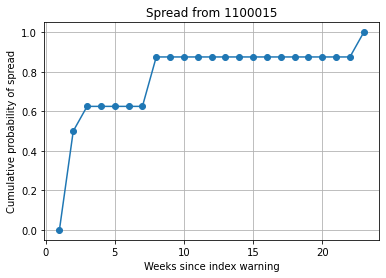

In [228]:
index_city = city
neighbours = list(set_muni_mob.cod_ibge_muni.unique())#[1100023,1100049,1100122,1100189,1100205,1100254,1100288,1100296]

res, prob_curve = compute_spread_probability(table, index_city, neighbours)


In [229]:
print(res)
print(prob_curve)

      city  delay_weeks
0  1100023            8
1  1100049            2
2  1100122            2
3  1100189            3
4  1100205            8
5  1100254            2
6  1100288            2
7  1100296           23
    weeks  P(spread)
0       1      0.000
1       2      0.500
2       3      0.625
3       4      0.625
4       5      0.625
5       6      0.625
6       7      0.625
7       8      0.875
8       9      0.875
9      10      0.875
10     11      0.875
11     12      0.875
12     13      0.875
13     14      0.875
14     15      0.875
15     16      0.875
16     17      0.875
17     18      0.875
18     19      0.875
19     20      0.875
20     21      0.875
21     22      0.875
22     23      1.000


In [230]:
def conditional_spread_prob(df, index_city, neighbours, k=1):
    """
    Compute P(neighbour has >=1 warning within k weeks starting at same week as index warning),
    aggregated over all index warnings observed in df.
    
    Parameters
    ----------
    df : DataFrame (rows=cities indexed by code, cols=week labels)
    index_city : city code
    neighbours : list of neighbour city codes
    k : int, window size in weeks (k=0 means same week only; k=1 means same week or next week)
    """
    weeks = list(df.columns)
    n_weeks = len(weeks)
    
    # Find all weeks where index city has a warning (=1)
    index_weeks = [i for i,w in enumerate(weeks) if df.loc[index_city, w] == 1]
    if not index_weeks:
        return None
    
    # For each neighbour, count how many index-week events were followed by at least one warning
    results = []
    for n in neighbours:
        triggered = 0
        total = 0
        for iw in index_weeks:
            # define window [iw, iw + k] inclusive, but not beyond available weeks
            start = iw
            end = min(iw + k, n_weeks - 1)
            total += 1
            # check if neighbour has any 1 in that window
            window_weeks = weeks[start:end+1]
            if df.loc[n, window_weeks].sum() > 0:
                triggered += 1
        prob = triggered / total if total > 0 else np.nan
        results.append({'neighbour': n, 'triggered': triggered, 'total_index_events': total, 'P': prob})
    
    res_df = pd.DataFrame(results).set_index('neighbour')
    # Aggregate across neighbours: probability that *a random neighbour* is triggered
    agg_P = res_df['P'].mean()
    # Probability that at least one neighbour is triggered for each index event
    # compute per index event whether any neighbour had 1 in window, then average
    any_trigger_per_event = []
    for iw in index_weeks:
        start = iw
        end = min(iw + k, n_weeks - 1)
        window_weeks = weeks[start:end+1]
        # check across all neighbours for that index event
        any_trigger = (df.loc[neighbours, window_weeks].sum(axis=0).sum() > 0)
        any_trigger_per_event.append(1 if any_trigger else 0)
    prob_any_neighbour = np.mean(any_trigger_per_event)
    
    return res_df, agg_P, prob_any_neighbour, index_weeks



In [231]:
# Compute for k = 0 (same week), k = 1 (same or next week), and k = 2
outputs = {}
for k in [0,1,2]:
    res_df, agg_P, prob_any_neighbour, index_weeks = conditional_spread_prob(table, index_city, neighbours, k=k)
    outputs[k] = {'per_neighbour': res_df, 'avg_P_neighbour': agg_P, 'P_any_neighbour': prob_any_neighbour, 'index_weeks': index_weeks}

# Display results
for k, out in outputs.items():
    print(f"\n=== Window k={k} (same week + next {k} weeks) ===")
    print("Index city warning weeks (positions):", out['index_weeks'])
    display(out['per_neighbour'])  # Using display so DataFrame looks nice in the notebook
    print(f"Average neighbour-level probability P = {out['avg_P_neighbour']:.3f}")
    print(f"Probability at least one neighbour triggered given an index event = {out['P_any_neighbour']:.3f}")



=== Window k=0 (same week + next 0 weeks) ===
Index city warning weeks (positions): [35, 36, 44, 45, 46, 47, 48, 49, 50, 51, 53, 54, 55, 56, 57, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 79, 80, 81, 87, 88, 101, 103, 112, 116, 117, 126, 141]


,triggered,total_index_events,P
neighbour,,,
1100023,9,40,0.225
1100049,11,40,0.275
1100122,11,40,0.275
1100189,14,40,0.350
1100205,13,40,0.325
1100254,13,40,0.325
1100288,17,40,0.425
1100296,16,40,0.400


Average neighbour-level probability P = 0.325
Probability at least one neighbour triggered given an index event = 0.925

=== Window k=1 (same week + next 1 weeks) ===
Index city warning weeks (positions): [35, 36, 44, 45, 46, 47, 48, 49, 50, 51, 53, 54, 55, 56, 57, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 79, 80, 81, 87, 88, 101, 103, 112, 116, 117, 126, 141]


,triggered,total_index_events,P
neighbour,,,
1100023,14,40,0.350
1100049,21,40,0.525
1100122,16,40,0.400
1100189,19,40,0.475
1100205,22,40,0.550
1100254,21,40,0.525
1100288,25,40,0.625
1100296,22,40,0.550


Average neighbour-level probability P = 0.500
Probability at least one neighbour triggered given an index event = 0.975

=== Window k=2 (same week + next 2 weeks) ===
Index city warning weeks (positions): [35, 36, 44, 45, 46, 47, 48, 49, 50, 51, 53, 54, 55, 56, 57, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 79, 80, 81, 87, 88, 101, 103, 112, 116, 117, 126, 141]


,triggered,total_index_events,P
neighbour,,,
1100023,20,40,0.500
1100049,25,40,0.625
1100122,22,40,0.550
1100189,23,40,0.575
1100205,27,40,0.675
1100254,27,40,0.675
1100288,28,40,0.700
1100296,26,40,0.650


Average neighbour-level probability P = 0.619
Probability at least one neighbour triggered given an index event = 1.000
